
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, September 18 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer




# Question 2: Maximum likelihood estimate (10 pts)

Prove the statement on slide 3 of notes on MLR:
"Then minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model."


## Answer

Let's say that there are n data points. X is the feature vector, **w** is the weight vector. If the modeling assumptions are correct, the joint distribution of Y given X is given by the below equation

\begin{align*}
P(Y|X) = \frac{1}{\sqrt{2 \pi}\sigma} \exp^{\sum_{i = 1}^n -(y_i -  w^T x_i)^2/\sigma^2}
\end{align*}

MLE  selects the predictor coeffiecients **w** in such a way that it maximizes the probability of encountering the observed dataset. Its clear that this probability is maximized if we maximize the exponential term, which is maximized if the maximize the coefficient of the exponent term. Thus we need to maximize the below term : 

\begin{align*}
max : \sum_{i = 1}^n -(y_i -  w^T x_i)^2/\sigma^2
\end{align*}

which is same as minimizing 

\begin{align*}
min : \sum_{i = 1}^n (y_i -  w^T x_i)^2/\sigma^2
\end{align*}

This final equation (which represents the negative log-likelihood) is proportional to the mean square error which we minimise in OLS.

# Question 3: Collinearity Issues (5 pts)

What is the “collinearity” issue encountered in MLR? Why is this a problem when you try to use MLR?
Suggest one way of addressing this problem.


## Answer

If we can write a variable as linear combination of other variable then we get collinearity problem
Exact collinearity : The determinant of matrix of Normal Equations is zero. Can't take inverse and so can't solve for the predictor coefficients.

Near collinearity : Even when there is high correlation among variables, the determinant of the Normal Equation would be very close to zero, and the uncertainty in the estimates for the coefficients would be very high.

Find out the variables which are causing this issue and drop them. Take PCA, and then do regression in the transformed space.

# Question 4: Multiple Linear Regression in Python (20 pts)

Use the following code to import the allstate-claims-severity dataset and linear models in python. The dataset is taken from https://www.kaggle.com/c/allstate-claims-severity I have removed the categorical variables to make it easire to run the models. Because of this MAE (Mean absolute error) will be on higher end.



In [26]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

train_df = pd.read_csv("reduced_train.csv")

X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. The code for this is given below. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

## Answer

## (a)

In [27]:
print(X.shape)

(188318, 14)


## (b)

In [28]:
clf = linear_model.LinearRegression()
clf.fit(X, Y)

# print intercept and coefficients
print('Intercept: ', clf.intercept_)
print('Coef: ', clf.coef_)

predictions = clf.predict(X)

mae = mean_absolute_error(Y, predictions)
print('MAE: ', mae)

Intercept:  1477.3166386687897
Coef:  [-2137.11121171  1762.2406163    -56.57968487  -301.1729806
    30.03201819  -557.22509919  1707.95520608   298.61240614
  2049.37910438  -250.01986129 -1732.34887444  2724.38985824
  -631.30128902   273.62600504]
MAE:  1950.3606265639835


## (c)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, Y_train)
predictions_train = clf_train.predict(X_train)
mae_train = mean_absolute_error(Y_train, predictions_train)
print('MAE train: ', mae_train)
predictions_test = clf_train.predict(X_test)
mae_test = mean_absolute_error(Y_test, predictions_test)
print('MAE test: ', mae_test)

MAE train:  1946.9866773014621
MAE test:  1954.111059596165


## (d)

/Users/aashishkumar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


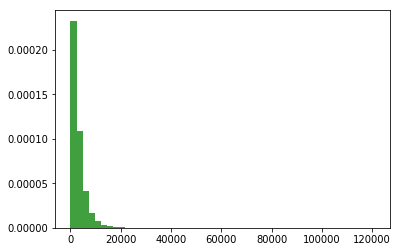

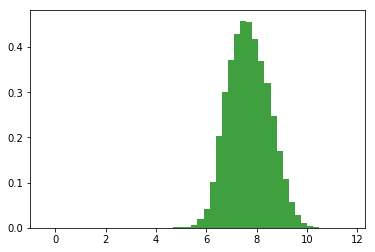

MAE train:  1797.4369165421042
MAE test:  1810.6519682594767


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(Y_train, 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

plt.hist(np.log(Y_train), 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

log_Y_train = np.log(Y_train)

clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, log_Y_train)
predictions_train = clf_train.predict(X_train)
predictions_train = np.exp(predictions_train)
mae_train = mean_absolute_error(Y_train, predictions_train)
print('MAE train: ', mae_train)

predictions_test = clf_train.predict(X_test)
mae_test = mean_absolute_error(Y_test, np.exp(predictions_test))
print('MAE test: ', mae_test)

# Question 5: Ridge and Lasso Regression (25 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. Take log of the Y_train and use it for training. The code for this is given below.

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

## Answer



## 1

In [31]:
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
import matplotlib.pyplot as plt
%matplotlib inline

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

log_Y_Train = np.log(Y_train)

n_folds = 5
k_fold = KFold(n_folds)
lasso_alphas =  10**np.linspace(10,-6,100)*0.5       #(start at 100, end at -2 )           
lasso_avg_mae = {}

for alpha in lasso_alphas:
    lasso = linear_model.Lasso(alpha=alpha,tol=.1)
    avg_mae = 0
    for train, test in k_fold.split(X_train):
        lasso.fit(X_train.iloc[train], log_Y_Train.iloc[train])
        avg_mae = avg_mae + mean_absolute_error(Y_train.iloc[test], np.exp(lasso.predict(X_train.iloc[test]))) 
    lasso_avg_mae[alpha] = avg_mae / n_folds
best_alpha_lasso = min(lasso_avg_mae, key=lasso_avg_mae.get)

print("Best lasso alpha: {}".format(best_alpha_lasso))

ridge_alphas =  10**np.linspace(10,-6,100)*0.5
ridge_avg_mae = {}

for alpha in ridge_alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    avg_mae = 0
    for k, (train, test) in enumerate(k_fold.split(X_train)):
        ridge.fit(X_train.iloc[train], log_Y_Train.iloc[train])
        avg_mae = avg_mae + mean_absolute_error(Y_train.iloc[test], np.exp(ridge.predict(X_train.iloc[test]))) 
    ridge_avg_mae[alpha] = avg_mae / n_folds
best_alpha_ridge = min(ridge_avg_mae, key=ridge_avg_mae.get)

print("Best ridge alpha: {}".format(best_alpha_ridge))

Best lasso alpha: 9.153691401476811e-05
Best ridge alpha: 13.5929412136647


## 2

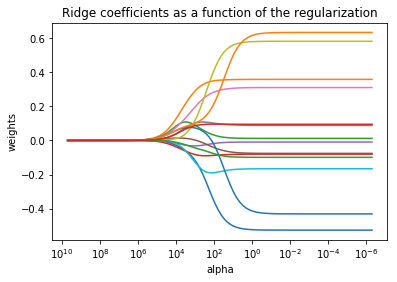

In [32]:
alphas = 10**np.linspace(10,-6,100)*0.5

ridge = linear_model.Ridge(alpha=alpha)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, log_Y_Train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

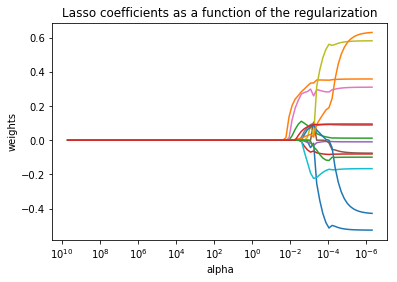

In [33]:
alphas = 10**np.linspace(10,-6,100)*0.5           #start at 10 stop at -2 giv 100 numbers

lasso = linear_model.Lasso(alpha=alpha,tol=.1)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a,tol=.1)
    lasso.fit(X_train, log_Y_Train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

## 3

In [34]:
linear_clf = linear_model.LinearRegression()
ridge_clf = linear_model.Ridge(alpha=best_alpha_ridge)
lasso_clf = linear_model.Lasso(alpha=best_alpha_lasso,tol=.1)#, max_iter=100000)#,tol=1)

def fit_reg(model, name):
    model.fit(X_train, log_Y_Train)
    pred = model.predict(X_test)
    mse = mean_absolute_error(np.exp(pred), Y_test)
    print("MSE for {0}: {1}".format(name, mse))

fit_reg(linear_clf, "linear")
fit_reg(ridge_clf, "ridge")
fit_reg(lasso_clf, "lasso")

MSE for linear: 1810.6519682594767
MSE for ridge: 1810.6310418084493
MSE for lasso: 1810.6856987036242


## 4

In [35]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train, log_Y_Train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [36]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, log_Y_Train)
mean_absolute_error(Y_test, np.exp(lasso.predict(X_test)))

1810.6388748733277

In [37]:
lassocv.alpha_

1.742378003185893e-05

In [38]:
lasso.coef_

array([-0.51711081,  0.35670005,  0.01228378, -0.08093894, -0.00933405,
       -0.0684882 ,  0.30543654,  0.08876903,  0.57270395, -0.16887018,
       -0.32254525,  0.52348019, -0.09978342,  0.09439036])

# Question 6 (10pts)

Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.

## Answer

\begin{equation}
\textbf{w}^{*} = \min_{w}{\frac{1}{2}\sum_{n = 1}^Nr_n\{t_n - \textbf{w}^\textrm{T}\phi(x_n)\}^2}
\end{equation}

Take the derivative and set equal to 0:
\begin{align*}
\frac{\partial \textrm{E}_\textrm{D}(\textbf{w})}{\partial \textbf{w}} &= \
\sum_{n = 1}^Nr_n\{t_n - \textbf{w}^\textrm{T}\phi(x_n)\}(-\phi(x_n)) \\
&= -\sum_{n = 1}^Nr_n\{t_n - \textbf{w}^\textrm{T}\phi(x_n)\}\phi(x_n) \\
&= -\sum_{n = 1}^Nr_nt_n\phi(x_n) + \sum_{n = 1}^Nr_n\textbf{w}^\textrm{T}\phi(x_n)\phi(x_n)^{\textrm{T}} = 0
\end{align*}

Solving for $\textbf{w}$:
\begin{equation}
\textbf{w}^{*} = \bigg(\sum_{n = 1}^Nr_n\textbf{w}^\textrm{T}\phi(x_n)\phi(x_n)^{\textrm{T}}\bigg)^{-1}\bigg(\sum_{n = 1}^Nr_nt_n\phi(x_n)\bigg)
\end{equation}


**An alternative approach, using vectorized notation:**


Let there be N data points. And M features per data point.

Let us denote the variable we are predicting with **T** which is Nx1 dimensional matrix.

The coefficient matrix is denoted by **w** which is MX1 in dimensions. 

Let us denote these weigths r by a diagonal matrix **R** which is of NxN dimension. For example for 3 data points it would look like

\begin{align*}
R = 
\begin{bmatrix}
r1&0&0\\
0&r2&0\\
0&0&r3\\
\end{bmatrix}
\end{align*}

So, we can write the sum of squares function as

\begin{align*}
min : (T - \phi w)^T R(T-\phi w)
\end{align*}

We can write these equations as :

\begin{align*}
min : T^T RT - T^T R\phi w - w^T \phi ^T RT + w^T \phi ^T R\phi w
\end{align*}

Differentiate it w.r.t **w** matrix, we get

\begin{align*}
-2\phi ^T RT + 2\phi ^T R\phi w = 0 \\
w = (\phi ^T R\phi)^{-1} \phi ^T RT
\end{align*}

Interpretation : 
(i) Our assumption is that the errors have constant variance. But if it not true, and error varies with each data point then we can use this scaling factor to make the variance constant. For example, we can set this scaling factor as 

\begin{align*}
r_i = \frac{1}{\sigma_i^2} 
\end{align*}

If we use this scaling factor, then the variance of each error will become 1, and thus all of them will have same variance.

Detailed Explanation

(i) If the output is modeled as $t_n = \textbf{w}^{\textrm{T}}\phi(x_n) + \nu_n$, where the noise $\nu_n \sim \mathcal{N}(0,\,\sigma_{n}^{2})$, then minimizing $\textrm{E}_\textrm{D}(\textbf{w})$ is the same as minimizing the log-likelihood of the output if noise variance $\sigma_n^2 = \frac{1}{r_n}$ or $\sigma_n^2 = \frac{1}{2r_n}$.

Consider the Gaussian pdf:
\begin{equation}
p(t_n) = \prod_{i = 1}^N \frac{1}{\sqrt{2\pi\sigma_n^2}}\exp{-\bigg\{\frac{(t_n-\textbf{w}^{\textrm{T}}\phi(x_n))^2}{2\sigma_n^2}\bigg\}}
\end{equation}

If we take the log likelihood, we get
\begin{equation}
\frac{1}{2}\textrm{N}\log(2\pi\sigma_n^2) - \sum_{n=1}^N\frac{(t_n-\textbf{w}^{\textrm{T}}\phi(x_n))^2}{2\sigma_n^2},
\end{equation}
and if we take the derivative w.r.t. $\textbf{w}$, the first term falls out, and we are left with our objective function if $\sigma_n^2 = \frac{1}{r_n}$ or $\sigma_n^2 = \frac{1}{2r_n}$.

(ii) If we consider $r_n$ as representing the number of duplicates of the n-th data point, then when we derive the squared error function, each squared sample error $\{t_n - \textbf{w}^\textrm{T}\phi(x_n)\}^2$ is added $r_n$ times, so $r_n$ is effectively a multiplicative factor, and the obective is still to solve:
\begin{equation}
\textbf{w}^{*} = \min_{w}{\frac{1}{2}\sum_{n = 1}^Nr_n\{t_n - \textbf{w}^\textrm{T}\phi(x_n)\}^2}
\end{equation}
or
\begin{equation}
\textbf{w}^{*} = \min_{w}{\sum_{n = 1}^Nr_n\{t_n - \textbf{w}^\textrm{T}\phi(x_n)\}^2}
\end{equation}